Import Libraries

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler


Error functions

In [2]:
def MeanSquareError(y_act,y_predicted):
    y_test = list(y_act)
    y_pred = list(y_predicted)
    n = len(y_test)
    error = 0.0;
    for i in range(0,n):
        error+=(y_test[i]-y_pred[i])**2
    return error/n

def RootMeanSquareError(y_act,y_predicted):
    y_test = list(y_act)
    y_pred = list(y_predicted)
    n = len(y_test)
    error = 0.0;
    for i in range(0,n):
        error+=(y_test[i]-y_pred[i])**2
    return (error/n)**0.5


def MeanAbsoluteError(y_act,y_predicted):
    y_test = list(y_act)
    y_pred = list(y_predicted)
    n = len(y_test)
    error = 0.0;
    for i in range(0,n):
        error+=abs(y_test[i]-y_pred[i])
    return (error/n)

def MeanAbsolutePercentageError(y_act,y_predicted):
    y_test = (y_act)
    y_pred = (y_predicted)

    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    return mape


def Accuracy(y_act,y_predicted):
    perAccuracy = (100.0-MeanAbsolutePercentageError(y_act,y_predicted))
    return perAccuracy

In [3]:
path = '/content/Dharmapuri.csv'

# # Load the CSV file into a pandas DataFrame
# df = pd.read_csv(path)

# # Interpolate the null values using linear interpolation
# df = df.interpolate()

# # Fill remaining null values with the mean of the forward and backward values
# df = df.fillna(df.mean()).round(2)
# # Write the updated DataFrame to a new CSV file
# df.to_csv(path, index=False)

In [4]:

df = pd.read_csv(path) # access to dataset
df.head()

,Year,MO,DY,T2MDEW,PRECTOTCORR,PS,WD10M,TS,WS10M_RANGE,T2M,SSM,SUSM,SUSMA,SSMA,SMP
0,2016,1,1,15.91,0.0,96.24,50.44,20.83,4.30,20.20,9.61,73.42,0.77,0.67,0.45
1,2016,1,2,14.48,0.0,96.28,46.56,20.87,2.87,20.16,9.67,75.08,0.78,0.68,0.46
2,2016,1,3,13.90,0.0,96.16,50.75,20.61,3.23,20.13,9.72,76.74,0.78,0.68,0.46
3,2016,1,4,13.98,0.0,96.15,62.00,20.96,2.69,20.30,9.46,74.37,0.76,0.68,0.45
4,2016,1,5,14.58,0.0,96.09,58.81,21.33,1.73,20.51,9.19,72.00,0.75,0.68,0.44


Split Training and Testing Data

In [5]:
X = df.drop(['SUSM','SSM'], axis=1)
# print(X)
y1 = df['SUSM']

# we are spliting of  the data into training and testing.
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)



Linear Regression

In [6]:

# fit the model and make predictions using LinearRegression 
model1 = LinearRegression()

model1.fit(X1_train, y1_train)

y1_pred = model1.predict(X1_test)

Level 1(Surface Soil Moisture) Prediction Parameters

Error Parameters of LinearRegression
Mean squared error for SUSM: 1.46
Root Mean squared error for SUSM: 1.21
Mean Absolute error for SUSM: 0.87
Mean Absolute Percentage Error for SUSM: 2.36 %



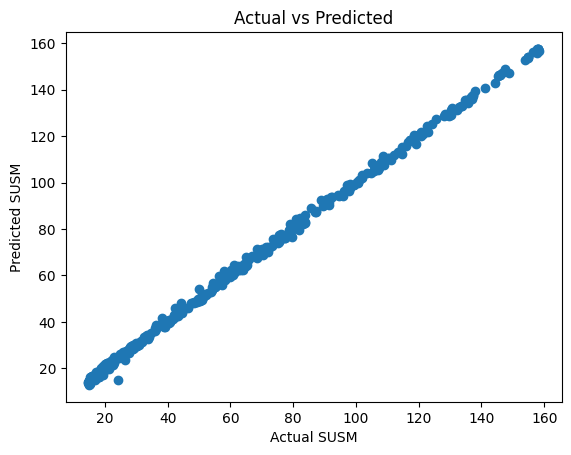

In [7]:
print('Error Parameters of LinearRegression')

mse1 = MeanSquareError(y1_test, y1_pred)
print("Mean squared error for SUSM: {:.2f}".format(mse1))

rmse1 = RootMeanSquareError(y1_test, y1_pred)
print("Root Mean squared error for SUSM: {:.2f}".format(rmse1))

mae1 = MeanAbsoluteError(y1_test, y1_pred)
print("Mean Absolute error for SUSM: {:.2f}".format(mae1))

mape1 = MeanAbsolutePercentageError(y1_test, y1_pred)
print("Mean Absolute Percentage Error for SUSM: {:.2f}".format(mape1)+' %')

print()
# Scatter plot of actual vs predicted values
plt.scatter(y1_test, y1_pred)
plt.title('Actual vs Predicted')
plt.xlabel('Actual SUSM')
plt.ylabel('Predicted SUSM')
plt.show()


SVM Regression Model

In [8]:
# Apply feature scaling to the dataset
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

# Define the SVM regression model with the RBF kernel
svr1 = SVR(kernel='rbf', C=100, gamma=0.1)

# Train the SVM model using the training dataset
svr1.fit(X1_train, y1_train)

# Evaluate the performance of the trained model using the testing dataset
y1_pred = svr1.predict(X1_test)


Level 1(Surface Soil Moisture) Prediction Parameters

Error Parameters of SVM
Mean squared error for SUSM: 10.51
Root Mean squared error for SUSM: 3.24
Mean Absolute error for SUSM: 1.12
Mean Absolute Percentage Error for SUSM: 2.87 %



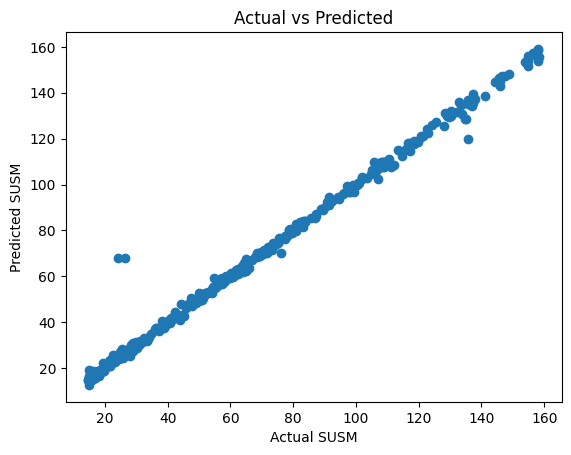

In [9]:


print('Error Parameters of SVM')

mse1 = MeanSquareError(y1_test, y1_pred)
print("Mean squared error for SUSM: {:.2f}".format(mse1))

rmse1 = RootMeanSquareError(y1_test, y1_pred)
print("Root Mean squared error for SUSM: {:.2f}".format(rmse1))

mae1 = MeanAbsoluteError(y1_test, y1_pred)
print("Mean Absolute error for SUSM: {:.2f}".format(mae1))

mape1 = MeanAbsolutePercentageError(y1_test, y1_pred)
print("Mean Absolute Percentage Error for SUSM: {:.2f}".format(mape1)+' %')

print()
# Scatter plot of actual vs predicted values
plt.scatter(y1_test, y1_pred)
plt.title('Actual vs Predicted')
plt.xlabel('Actual SUSM')
plt.ylabel('Predicted SUSM')
plt.show()


Decision Tree Regression

In [10]:
decisionModel1 = DecisionTreeRegressor()


# we are spliting of  the data into training and testing.
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)


decisionModel1.fit(X1_train,y1_train)


y1_pred = decisionModel1.predict(X1_test)


Level 1(Surface Soil Moisture) Prediction Parameters

Error Parameters of decisionTree on leve1
Mean squared error for SUSM: 3.80
Root Mean squared error for SUSM: 1.95
Mean Absolute error for SUSM: 1.34
Mean Absolute Percentage Error for SUSM: 2.66 %



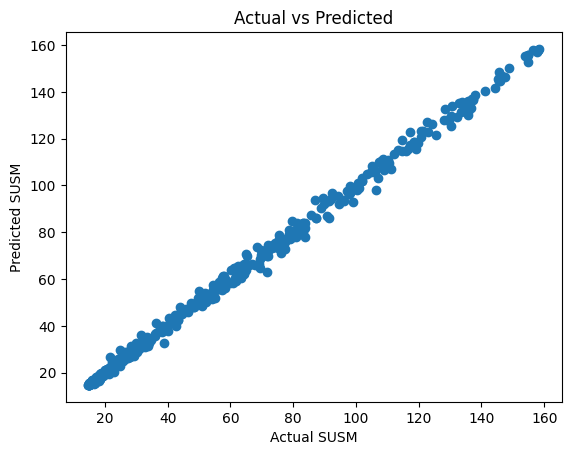

In [11]:
print('Error Parameters of decisionTree on leve1')

mse1 = MeanSquareError(y1_test, y1_pred)
print("Mean squared error for SUSM: {:.2f}".format(mse1))

rmse1 = RootMeanSquareError(y1_test, y1_pred)
print("Root Mean squared error for SUSM: {:.2f}".format(rmse1))

mae1 = MeanAbsoluteError(y1_test, y1_pred)
print("Mean Absolute error for SUSM: {:.2f}".format(mae1))

mape1 = MeanAbsolutePercentageError(y1_test, y1_pred)
print("Mean Absolute Percentage Error for SUSM: {:.2f}".format(mape1)+' %')

print()
# Scatter plot of actual vs predicted values
plt.scatter(y1_test, y1_pred)
plt.title('Actual vs Predicted')
plt.xlabel('Actual SUSM')
plt.ylabel('Predicted SUSM')
plt.show()


Random Forest Regression

In [12]:
# fit the model and make predictions using randomForest 
Rmodel1 = RandomForestRegressor(n_estimators=100, random_state=42)


Rmodel1.fit(X1_train, y1_train)


y1_pred = Rmodel1.predict(X1_test)


Level 1(Surface Soil Moisture) Prediction Parameters

Error Parameters of RandomForest
Mean squared error for SUSM: 2.12
Root Mean squared error for SUSM: 1.46
Mean Absolute error for SUSM: 0.97
Mean Absolute Percentage Error for SUSM: 1.98 %



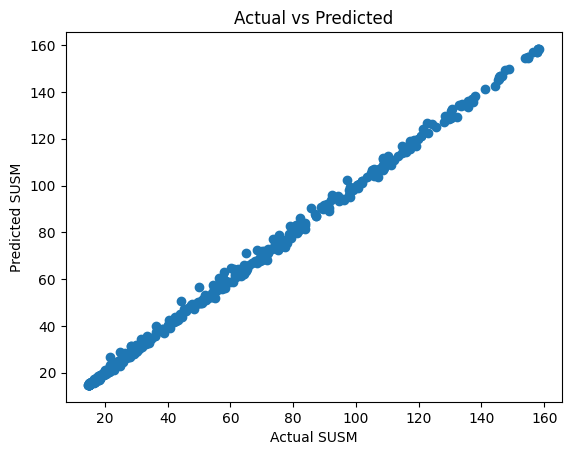

In [13]:
print('Error Parameters of RandomForest')


mse1 = MeanSquareError(y1_test, y1_pred)
print("Mean squared error for SUSM: {:.2f}".format(mse1))

rmse1 = RootMeanSquareError(y1_test, y1_pred)
print("Root Mean squared error for SUSM: {:.2f}".format(rmse1))

mae1 = MeanAbsoluteError(y1_test, y1_pred)
print("Mean Absolute error for SUSM: {:.2f}".format(mae1))

mape1 = MeanAbsolutePercentageError(y1_test, y1_pred)
print("Mean Absolute Percentage Error for SUSM: {:.2f}".format(mape1)+' %')

print()
# Scatter plot of actual vs predicted values
plt.scatter(y1_test, y1_pred)
plt.title('Actual vs Predicted')
plt.xlabel('Actual SUSM')
plt.ylabel('Predicted SUSM')
plt.show()



## Soil Moisture estimation using Deep Learning

**Sil moisture estimation using LSTM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# access to dataset
df = pd.read_csv(path)

# define X and y variables
X = df.drop(['SUSM','SSM'], axis=1)
# print(X)
y1 = df['SUSM']

# reshape the input data to have 3 dimensions (samples, time steps, features)
X = X.values.reshape(X.shape[0], 1, X.shape[1])

# split the data into training and testing
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)


# normalize the input data
scaler = MinMaxScaler()
X1_train_norm = scaler.fit_transform(X1_train.reshape(X1_train.shape[0], -1)).reshape(X1_train.shape)
X1_test_norm = scaler.transform(X1_test.reshape(X1_test.shape[0], -1)).reshape(X1_test.shape)


# build the LSTM model
model1 = Sequential()


model1.add(LSTM(50, input_shape=(X1_train_norm.shape[1], X1_train_norm.shape[2])))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')


# train the model
model1.fit(X1_train_norm, y1_train, epochs=600, batch_size=30, verbose=1)


# evaluate the model
y1_pred = model1.predict(X1_test_norm)
y1_test = y1_test.values.reshape(-1, 1)



Level 1(Surface Soil Moisture) Prediction Parameters

Error Parameters of LSTM
Mean squared error for SUSM: 0.62
Root Mean squared error for SUSM: 0.79
Mean Absolute error for SUSM: 0.60
Mean Absolute Percentage Error for SUSM: 1.58 %



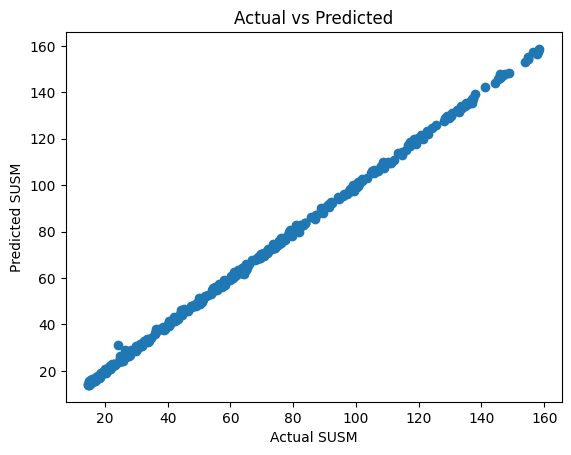

In [15]:
print('Error Parameters of LSTM')

mse1 = MeanSquareError(y1_test, y1_pred)
print("Mean squared error for SUSM: {:.2f}".format(mse1[0]))

rmse1 = RootMeanSquareError(y1_test, y1_pred)
print("Root Mean squared error for SUSM: {:.2f}".format(rmse1[0]))

mae1 = MeanAbsoluteError(y1_test, y1_pred)
print("Mean Absolute error for SUSM: {:.2f}".format(mae1[0]))

mape1 = MeanAbsolutePercentageError(y1_test, y1_pred)
print("Mean Absolute Percentage Error for SUSM: {:.2f}".format(mape1)+' %')

print()
# Scatter plot of actual vs predicted values
plt.scatter(y1_test, y1_pred)
plt.title('Actual vs Predicted')
plt.xlabel('Actual SUSM')
plt.ylabel('Predicted SUSM')
plt.show()
